In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error, mean_absolute_error
import numpy as np



/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df=pd.read_csv('/content/station_data_dataverse3.csv')



In [ ]:
df['distance']=df['distance'].fillna(df['distance'].mean())

In [ ]:
# Assuming df is already defined
label_encoder = LabelEncoder()
df['weekday'] = label_encoder.fit_transform(df['weekday'])
df['platform'] = label_encoder.fit_transform(df['platform'])



In [ ]:
# Define features and target
X = df[
    ['chargeTimeHrs','startTime', 'endTime', 'weekday', 'distance','managerVehicle'] +
    [ 'userId', 'stationId','locationId']
]
y = df['kwhTotal']



In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [ ]:
# Initialize and train the LightGBM Regressor
lgbm_model = LGBMRegressor(random_state=0)
lgbm_model.fit(X_train, y_train)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 2716, number of used features: 9
[LightGBM] [Info] Start training from score 5.793811


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(random_state=0)

In [ ]:
# Predict on the test set
y_pred = lgbm_model.predict(X_test)




In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [ ]:
# Print the results
print("LightGBM RMSE:", rmse)
print("LightGBM R² Score:", r2)
mape=mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)
print("MAE:", mean_absolute_error(y_test, y_pred))

LightGBM RMSE: 1.449146526440517
LightGBM R² Score: 0.7809751319526937
MAPE: 18250533848722.02
MAE: 0.9555238582263144


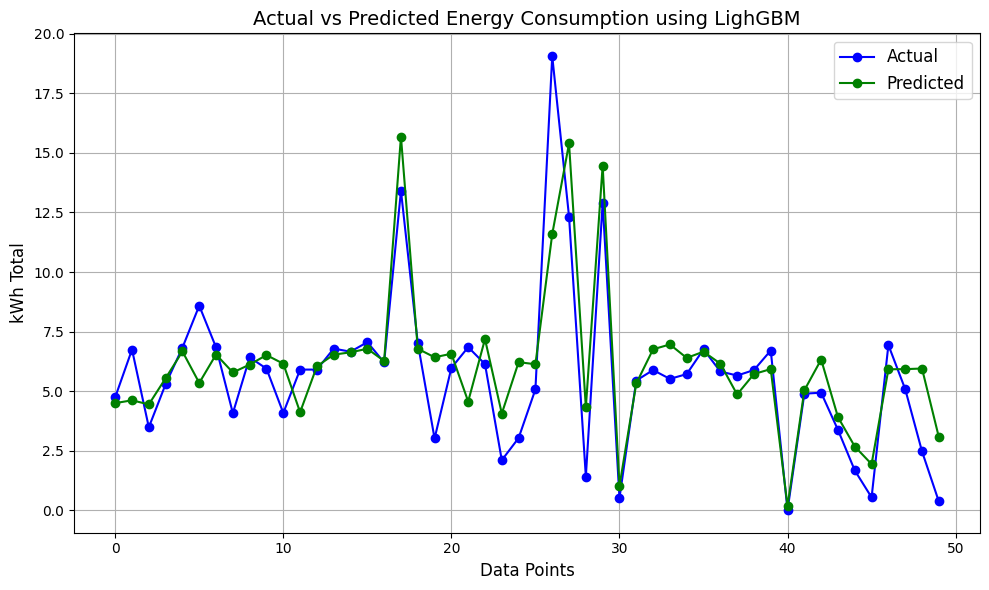

In [ ]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted on the same graph
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test.values[:50], label="Actual", color="blue", marker="o", linestyle="-")

# Plot predicted values
plt.plot(y_pred[:50], label="Predicted", color="green", marker="o", linestyle="-")

# Add title and labels
plt.title("Actual vs Predicted Energy Consumption using LighGBM", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("kWh Total", fontsize=12)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
